https://www.samsonzhang.com/2020/11/24/understanding-the-math-behind-neural-networks-by-building-one-from-scratch-no-tf-keras-just-numpy

In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt

def load_data():
    # with open('samples/t10k-images.idx3-ubyte','rb') as f:
    with open('samples/train-images.idx3-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, -1))
        data=data/255
    # with open('samples/t10k-labels.idx1-ubyte','rb') as f:
    with open('samples/train-labels.idx1-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        labels = labels.reshape((size,)) # (Optional)
    return labels, data, nrows, ncols

def load_validation_data():
    with open('samples/t10k-images.idx3-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, -1))
        data=data/255
    with open('samples/t10k-labels.idx1-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        labels = labels.reshape((size,)) # (Optional)
    return labels, data, nrows, ncols


In [2]:
def ReLU(Z):
    return np.maximum(Z,0)

def ReLU_dev(Z):
    return 1*(Z>0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def get_predictions(A2):
    return np.argmax(A2,axis=0)

In [3]:
def one_hot(y):
    yy=np.zeros((y.max()+1,y.size))
    yy[y,np.arange(y.size)]=1
    return yy

In [4]:
def cross_ent(y,y_hat): # true(onehotencoded), predicted
    return -np.log(y_hat.T[y.astype(bool).T])

In [5]:
def init_params():
    N_L1=10
    N_L2=10
    W1 = np.random.rand(N_L1, 784) - 0.5
    b1 = np.random.rand(N_L1, 1) - 0.5
    W2 = np.random.rand(N_L2, N_L1) - 0.5
    b2 = np.random.rand(N_L2, 1) - 0.5
    return W1, b1, W2, b2

In [6]:
# forward_prop(W1,b1,W2,b2,X):
# return Z1,A1,Z2,A2
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    N=Y.size
    one_hot_y=one_hot(Y)
    dZ2=A2-one_hot_y
    db2=np.sum(dZ2,axis=1,keepdims=True)/N
    dW2=dZ2.dot(A1.T)/N
    dZ1=W2.T.dot(dZ2)*ReLU_dev(Z1)
    db1=np.sum(dZ1,axis=1,keepdims=True)/N
    dW1=dZ1.dot(X.T)/N
    return dW1,db1,dW2,db2

In [7]:
def update_params(W1,b1, W2,b2,dW1,db1,dW2,db2,alpha):
    W1-=dW1*alpha
    b1-=db1*alpha
    W2-=dW2*alpha
    b2-=db2*alpha
    return W1, b1, W2, b2

In [8]:
def get_accuracy(predictions,Y):
    return np.sum(predictions==Y)/Y.size

In [9]:
def gradient_descent(X,Y,alpha,iterations,X_v=None,Y_v=None):
    W1, b1, W2, b2 =init_params()
    debug=[]
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1,b1, W2,b2,dW1,db1,dW2,db2,alpha)
    
        if i%10==0 or i==iterations-1:
            predictions=get_predictions(A2)
            acc=get_accuracy(predictions,Y)
            acc_v=0
            if X_v is not None and Y_v is not None:
                _,_,_,A2_v = forward_prop(W1,b1,W2,b2,X_v)
                predictions_v=get_predictions(A2_v)
                acc_v=get_accuracy(predictions_v,Y_v)
            debug.append((i,acc,acc_v))
            print(f"Iteration: {i}\t\tAccuracy: {acc:.4f} \t\tAccuracy_v: {acc_v:.4f}")

    return W1,b1,W2,b2,debug

In [10]:
labels_train, data_train, nrows,ncols =load_data()
data_train=data_train.T
labels_validation, data_validation, _,_ =load_validation_data()
data_validation=data_validation.T
W1,b1,W2,b2,debug=gradient_descent(data_train,labels_train,0.1,200,data_validation,labels_validation)

Iteration: 0		Accuracy: 0.0838 		Accuracy_v: 0.0954
Iteration: 10		Accuracy: 0.1253 		Accuracy_v: 0.1398
Iteration: 20		Accuracy: 0.1758 		Accuracy_v: 0.1880
Iteration: 30		Accuracy: 0.2730 		Accuracy_v: 0.2811
Iteration: 40		Accuracy: 0.3364 		Accuracy_v: 0.3417
Iteration: 50		Accuracy: 0.3884 		Accuracy_v: 0.3942
Iteration: 60		Accuracy: 0.4444 		Accuracy_v: 0.4507
Iteration: 70		Accuracy: 0.4967 		Accuracy_v: 0.5057
Iteration: 80		Accuracy: 0.5445 		Accuracy_v: 0.5515
Iteration: 90		Accuracy: 0.5858 		Accuracy_v: 0.5940
Iteration: 100		Accuracy: 0.6194 		Accuracy_v: 0.6265
Iteration: 110		Accuracy: 0.6470 		Accuracy_v: 0.6522
Iteration: 120		Accuracy: 0.6695 		Accuracy_v: 0.6751
Iteration: 130		Accuracy: 0.6894 		Accuracy_v: 0.6937
Iteration: 140		Accuracy: 0.7055 		Accuracy_v: 0.7105
Iteration: 150		Accuracy: 0.7193 		Accuracy_v: 0.7265
Iteration: 160		Accuracy: 0.7316 		Accuracy_v: 0.7396
Iteration: 170		Accuracy: 0.7419 		Accuracy_v: 0.7475
Iteration: 180		Accuracy: 0.7511 		Accu

Final accuracy (Using training data):	 0.76565
Final accuracy (Using validation data):	 0.7753


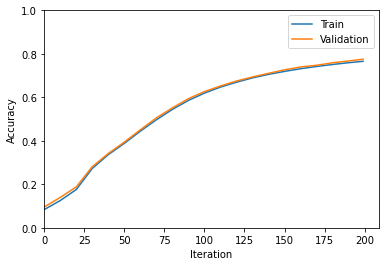

In [11]:
x,y1,y2=zip(*debug)
plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
ax = plt.gca()
ax.set_xlim([0, None])
ax.set_ylim([0, 1])
print("Final accuracy (Using training data):\t",y1[-1])
print("Final accuracy (Using validation data):\t",y2[-1])
ax.legend(["Train","Validation"])

# Accuracy checks with training data

In [22]:
_,_,_,A2=forward_prop(W1,b1,W2,b2,data_train)
predictions_train=get_predictions(A2)
acc=get_accuracy(predictions_train,labels_train)

correct=labels_train==predictions_train

print("Accuracy: ",acc)
print("Mislabeled: ", np.sum(~correct))
print("ID\tLabel\tPrediction\tError")
for i,(lab,pred,right) in enumerate(zip(*(labels_train,predictions_train,correct))):
    if not right:
        print(f"{i}\t{lab}\t\t{pred}\t {'x' if not right else ''}")
        pass


Accuracy:  0.7662166666666667
Mislabeled:  14027
ID	Label	Prediction	Error
0	5		3	 x
5	2		9	 x
11	5		6	 x
24	1		0	 x
28	2		7	 x
31	8		2	 x
33	9		7	 x
34	0		3	 x
35	5		9	 x
43	9		7	 x
48	9		5	 x
60	4		6	 x
61	4		1	 x
64	4		6	 x
65	5		8	 x
80	9		0	 x
85	8		3	 x
109	2		6	 x
111	3		9	 x
120	2		7	 x
134	1		9	 x
137	8		1	 x
138	5		0	 x
143	2		8	 x
148	7		2	 x
150	4		5	 x
158	7		9	 x
160	8		1	 x
161	2		3	 x
173	5		1	 x
175	5		6	 x
178	2		3	 x
181	3		5	 x
182	5		3	 x
183	9		7	 x
189	2		3	 x
190	2		6	 x
193	7		9	 x
199	2		3	 x
203	3		5	 x
212	7		1	 x
216	0		5	 x
224	1		7	 x
228	3		5	 x
232	0		6	 x
250	3		4	 x
253	2		6	 x
254	3		5	 x
256	6		8	 x
262	2		0	 x
264	9		7	 x
266	5		3	 x
272	4		9	 x
274	6		2	 x
278	5		6	 x
284	5		3	 x
287	5		3	 x
304	9		3	 x
306	5		0	 x
312	8		6	 x
316	5		2	 x
317	2		6	 x
334	9		7	 x
347	2		6	 x
348	8		1	 x
352	8		5	 x
370	7		1	 x
374	9		4	 x
375	2		6	 x
376	5		8	 x
380	4		2	 x
384	7		4	 x
390	2		8	 x
391	2		3	 x
404	8		3	 x
414	4		2	 x
417	5		3	 x
418	8		9	 x
420	5		8

Label: 9	Prediction: 7


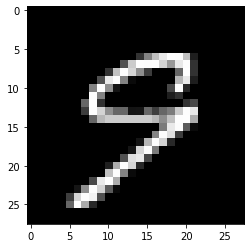

In [23]:
n=59939	
plt.imshow(data_train[:,n].reshape(nrows,ncols), cmap='gray')
print(f"Label: {labels_train[n]}\tPrediction: {predictions_train[n]}")
plt.show()

# Accuracy checks with validation data

In [24]:
_,_,_,A2=forward_prop(W1,b1,W2,b2,data_validation)
predictions_validation=get_predictions(A2)
acc=get_accuracy(predictions_validation,labels_validation)

correct=labels_validation==predictions_validation

print("Accuracy: ",acc)
print("Mislabeled: ", np.sum(~correct))
print("ID\tLabel\tPrediction\tError")
for i,(lab,pred,right) in enumerate(zip(*(labels_validation,predictions_validation,correct))):
    if not right:
        print(f"{i}\t{lab}\t\t{pred}\t {'x' if not right else ''}")
        pass


Accuracy:  0.7753
Mislabeled:  2247
ID	Label	Prediction	Error
6	4		9	 x
8	5		6	 x
15	5		0	 x
18	3		8	 x
22	6		2	 x
32	3		5	 x
33	4		6	 x
38	2		5	 x
45	5		3	 x
46	1		5	 x
52	5		4	 x
55	0		5	 x
58	9		4	 x
59	5		4	 x
62	9		4	 x
63	3		2	 x
65	4		8	 x
66	6		2	 x
73	9		8	 x
87	3		5	 x
92	9		4	 x
97	7		9	 x
100	6		2	 x
102	5		9	 x
104	9		4	 x
110	8		3	 x
124	7		4	 x
133	7		2	 x
147	2		6	 x
149	2		6	 x
150	9		3	 x
151	9		7	 x
165	5		8	 x
167	5		3	 x
175	7		1	 x
185	9		4	 x
187	5		8	 x
193	9		4	 x
195	3		8	 x
215	0		3	 x
217	6		8	 x
230	3		2	 x
232	8		6	 x
233	8		9	 x
241	9		3	 x
242	8		5	 x
243	7		4	 x
244	2		3	 x
245	3		5	 x
247	4		2	 x
249	2		1	 x
251	1		5	 x
253	5		3	 x
256	2		1	 x
259	6		0	 x
261	5		0	 x
264	9		5	 x
268	8		6	 x
270	3		9	 x
277	8		3	 x
290	8		5	 x
295	4		9	 x
298	2		8	 x
299	8		3	 x
300	4		1	 x
301	7		2	 x
306	2		1	 x
307	7		9	 x
310	3		8	 x
313	3		5	 x
317	5		8	 x
318	2		6	 x
320	9		1	 x
321	2		7	 x
324	0		5	 x
331	2		1	 x
333	5		8	 x
338	8		3	 x
340	5		0	 x
341	6		4	 x
34

Label: 5	Prediction: 0


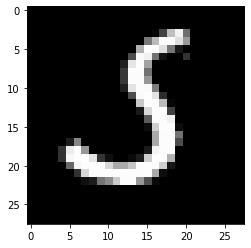

In [25]:
n=9970
plt.imshow(data_validation[:,n].reshape(nrows,ncols), cmap='gray')
print(f"Label: {labels_validation[n]}\tPrediction: {predictions_validation[n]}")
plt.show()